# Model performance figures

In [1]:
import numpy as np
import pandas as pd
from itertools import islice
from ast import literal_eval
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Rectangle
%matplotlib inline
plt.rcParams.update({'font.size': 14})

## Read in data

### DyGIE++
#### On PICKLE
First, read in the csv that contains the performances for all models (besides SeeDev) on PICKLE with no types:

In [2]:
dygiepp_no_labels_perf = pd.read_csv('/mnt/ufs18/home-118/lotrecks/Shiu_lab/pickle-corpus-code/data/straying_off_topic_data/model_output/dygiepp/15Jul2023_all_on_pickle_but_seedev/performance/15Jul2023_all_on_pickle_no_seedev_performance.csv')
dygiepp_no_labels_perf['model'] = dygiepp_no_labels_perf['pred_file'].str.split('_').str[-2]
dygiepp_no_labels_perf

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI,model
0,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.883557,0.891106,0.887275,0.608037,0.348510,0.442015,"(0.857079027355623, 0.9084136564951275)","(0.8753625636815292, 0.9081251757571311)","(0.8689741295964972, 0.9057122261710511)","(0.5372982621414583, 0.685561797752809)","(0.27739304532720793, 0.41112138949349963)","(0.37580711361156444, 0.49925964546402507)",pickle
1,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.193694,0.072919,0.105819,0.000000,0.000000,0.000000,"(0.1429979253112033, 0.2502936241610738)","(0.05333745205549978, 0.09474637681159417)","(0.07839296166227686, 0.13527554548482587)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)",ace05-relation
2,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.478968,0.674144,0.559745,0.057466,0.086344,0.068621,"(0.43032869912059807, 0.5308687868236084)","(0.6406513153003568, 0.7108491030638333)","(0.5190181925003347, 0.6002697495183045)","(0.03457632090684005, 0.08541554231822657)","(0.057188308886971524, 0.12067924528301884)","(0.044473370023383384, 0.09702656546489562)",scierc
3,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.557187,0.196518,0.289868,NaN,NaN,NaN,"(0.4912152530292231, 0.6242472804972805)","(0.1523317471518495, 0.24312158926383784)","(0.23576190476190473, 0.3419524854981555)",NaN,NaN,NaN,genia
4,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.589271,0.377282,0.459691,0.118089,0.023735,0.039048,"(0.5134214210792485, 0.6597671470822966)","(0.31619556173564173, 0.4429260106656407)","(0.3932587830568571, 0.5283259376302464)","(0.04967592592592593, 0.20930232558139536)","(0.007501830573391912, 0.04328817733990146)","(0.013247961852022767, 0.06758396923631556)",chemprot
5,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.478597,0.656190,0.553169,0.072374,0.089572,0.079652,"(0.4294379741252424, 0.5316811214758135)","(0.6164612612449871, 0.691908914545175)","(0.5141514693449252, 0.5977567158569393)","(0.03612494415231811, 0.11568160175684078)","(0.04887108610567514, 0.13172888094778185)","(0.042886436544521116, 0.1180061037639878)",scierc-lightweight
6,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.570708,0.160570,0.249894,NaN,NaN,NaN,"(0.49902699456975774, 0.643936419763142)","(0.11667512308468143, 0.20724809293513485)","(0.19321837835989722, 0.3061844812816278)",NaN,NaN,NaN,genia-lightweight


Now read in the SeeDev performance with no labels:

In [3]:
seedev_no_labels_perf = pd.read_csv('../data/straying_off_topic_data/model_output/dygiepp/15Jul2023_all_on_pickle_but_seedev/performance/17Jul2023_seedev_on_pickle_performance_no_labels.csv')
seedev_no_labels_perf['model'] = seedev_no_labels_perf['pred_file'].str.split('_').str[-2]
seedev_no_labels_perf

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI,model
0,17Jul2023_seedev_on_pickle_PICKLE_250_abstract...,PICKLE_250_abstracts_entities_and_relations_FI...,0.373344,0.314438,0.340887,0.167352,0.066984,0.094928,"(0.31789976918733104, 0.4304071630210769)","(0.26929228179228176, 0.35934436835687483)","(0.29586052643654476, 0.3803187764879307)","(0.04750056420672534, 0.349972186904005)","(0.017564797672573393, 0.14164540816326524)","(0.0264594334393325, 0.19697090527267153)",seedev


Now combine them:

In [4]:
dygiepp_no_labels_perf = pd.concat([dygiepp_no_labels_perf, seedev_no_labels_perf])
dygiepp_no_labels_perf = dygiepp_no_labels_perf.sort_values('ent_F1').reset_index(drop=True)
dygiepp_no_labels_perf

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI,model
0,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.193694,0.072919,0.105819,0.000000,0.000000,0.000000,"(0.1429979253112033, 0.2502936241610738)","(0.05333745205549978, 0.09474637681159417)","(0.07839296166227686, 0.13527554548482587)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)",ace05-relation
1,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.570708,0.160570,0.249894,NaN,NaN,NaN,"(0.49902699456975774, 0.643936419763142)","(0.11667512308468143, 0.20724809293513485)","(0.19321837835989722, 0.3061844812816278)",NaN,NaN,NaN,genia-lightweight
2,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.557187,0.196518,0.289868,NaN,NaN,NaN,"(0.4912152530292231, 0.6242472804972805)","(0.1523317471518495, 0.24312158926383784)","(0.23576190476190473, 0.3419524854981555)",NaN,NaN,NaN,genia
3,17Jul2023_seedev_on_pickle_PICKLE_250_abstract...,PICKLE_250_abstracts_entities_and_relations_FI...,0.373344,0.314438,0.340887,0.167352,0.066984,0.094928,"(0.31789976918733104, 0.4304071630210769)","(0.26929228179228176, 0.35934436835687483)","(0.29586052643654476, 0.3803187764879307)","(0.04750056420672534, 0.349972186904005)","(0.017564797672573393, 0.14164540816326524)","(0.0264594334393325, 0.19697090527267153)",seedev
4,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.589271,0.377282,0.459691,0.118089,0.023735,0.039048,"(0.5134214210792485, 0.6597671470822966)","(0.31619556173564173, 0.4429260106656407)","(0.3932587830568571, 0.5283259376302464)","(0.04967592592592593, 0.20930232558139536)","(0.007501830573391912, 0.04328817733990146)","(0.013247961852022767, 0.06758396923631556)",chemprot
5,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.478597,0.656190,0.553169,0.072374,0.089572,0.079652,"(0.4294379741252424, 0.5316811214758135)","(0.6164612612449871, 0.691908914545175)","(0.5141514693449252, 0.5977567158569393)","(0.03612494415231811, 0.11568160175684078)","(0.04887108610567514, 0.13172888094778185)","(0.042886436544521116, 0.1180061037639878)",scierc-lightweight
6,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.478968,0.674144,0.559745,0.057466,0.086344,0.068621,"(0.43032869912059807, 0.5308687868236084)","(0.6406513153003568, 0.7108491030638333)","(0.5190181925003347, 0.6002697495183045)","(0.03457632090684005, 0.08541554231822657)","(0.057188308886971524, 0.12067924528301884)","(0.044473370023383384, 0.09702656546489562)",scierc
7,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.883557,0.891106,0.887275,0.608037,0.348510,0.442015,"(0.857079027355623, 0.9084136564951275)","(0.8753625636815292, 0.9081251757571311)","(0.8689741295964972, 0.9057122261710511)","(0.5372982621414583, 0.685561797752809)","(0.27739304532720793, 0.41112138949349963)","(0.37580711361156444, 0.49925964546402507)",pickle


Now, read in the performance for the models that we could evaluate with types; for PICKLE this is a true labeled evaluation, for ChemProt, SeeDev and GENIA, this is the mapped types evaluation. All of these are in separate CSV files; we want to comboine them for ease of use.

In [5]:
prefix_path = '/mnt/home/lotrecks/Shiu_lab/pickle-corpus-code/data/straying_off_topic_data/model_output/dygiepp/15Jul2023_all_on_pickle_but_seedev/performance/'
typed_eval_dygiepp_paths = {
    'chemprot': '15Jul2023_chemprot_on_pickle_TYPES_MAPPED_performance.csv',
    'genia': '15Jul2023_GENIA_on_pickle_TYPES_MAPPED_performance.csv',
    'seedev': '17Jul2023_seedev_on_pickle_performance_MAPPED_labels.csv',
    'pickle': '15Jul2023_PICKLE_on_pickle_TYPES_MAPPED_performance.csv'
}
typed_eval_dygiepp_dfs = []
for dset, apath in typed_eval_dygiepp_paths.items():
    df = pd.read_csv(f'{prefix_path}{apath}')
    df['model'] = df['pred_file'].str.split('_').str[-2]
    typed_eval_dygiepp_dfs.append(df)
typed_eval_dygiepp_all_df = pd.concat(typed_eval_dygiepp_dfs).sort_values('ent_F1').reset_index(drop=True)
typed_eval_dygiepp_all_df

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI,model
0,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.166639,0.107436,0.130551,0.111271,0.021825,0.036006,"(0.10151235864914425, 0.23857180981506587)","(0.06004895647607037, 0.15896755655503933)","(0.07560255446587316, 0.1898002006506371)","(0.03771367521367522, 0.22448979591836735)","(0.006053467783410478, 0.04050865192403797)","(0.010176335369911077, 0.06353850034684996)",chemprot
1,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.352933,0.098635,0.153730,NaN,NaN,NaN,"(0.26963684371651614, 0.4360096153846154)","(0.06928701506849932, 0.13092115766551077)","(0.11307571228219436, 0.1983850317260391)",NaN,NaN,NaN,genia-lightweight
2,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.315242,0.111508,0.164282,NaN,NaN,NaN,"(0.24241811883266848, 0.38657853086001615)","(0.07554023320719212, 0.15069775358491572)","(0.1159320147789192, 0.21068759444275786)",NaN,NaN,NaN,genia
3,17Jul2023_seedev_on_pickle_PICKLE_250_abstract...,PICKLE_250_abstracts_entities_and_relations_FI...,0.192010,0.159925,0.174249,0.048003,0.019253,0.027238,"(0.15567399706783952, 0.23310967565210586)","(0.1298654243114866, 0.19146995531223718)","(0.14381794661062433, 0.20647461660556266)","(0.007543336944745397, 0.10816558441558437)","(0.003148602719033233, 0.03985012554927808)","(0.004632102378943097, 0.05703252032520325)",seedev
4,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.786266,0.792469,0.789318,0.486484,0.278747,0.353623,"(0.7473052218389438, 0.8231816865902558)","(0.7588560429469521, 0.8209822471542008)","(0.755175417517722, 0.8201116040765001)","(0.4104739010989011, 0.5480600048537798)","(0.2235184099077288, 0.32700939874896756)","(0.2997287522603978, 0.39846161761679355)",pickle


#### On original domain test set
Since PICKLE was already included in the on PICKLE evals above, we won't re-import it here.

In [6]:
all_prefix_path = '/mnt/home/lotrecks/Shiu_lab/pickle-corpus-code/data/straying_off_topic_data/model_output/dygiepp/17Jul2023_original_domain_application/performance/'
pick_prefix_path = '/mnt/home/lotrecks/Shiu_lab/pickle-corpus-code/data/straying_off_topic_data/model_output/dygiepp/15Jul2023_all_on_pickle_but_seedev/performance/'
original_dom_typed_eval_dygiepp_paths = {
    'chemprot': 'chemprot_on_original_test_with_types.csv',
    'scierc': 'scierc_on_original_test_with_types.csv',
    'genia': 'genia_on_original_test_with_types.csv',
    'seedev': 'seedev_on_original_test_with_types.csv',
    'pickle': '15Jul2023_PICKLE_on_pickle_TYPES_MAPPED_performance.csv'
}
original_dom_typed_eval_dygiepp_dfs = []
for dset, apath in original_dom_typed_eval_dygiepp_paths.items():
    if dset != 'pickle':
        df = pd.read_csv(f'{all_prefix_path}{apath}')
    else:
        df = pd.read_csv(f'{pick_prefix_path}{apath}')
    df['model'] = df['pred_file'].str.split('_').str[-2]
    original_dom_typed_eval_dygiepp_dfs.append(df)
original_dom_typed_eval_dygiepp_all_df = pd.concat(original_dom_typed_eval_dygiepp_dfs).sort_values('ent_F1').reset_index(drop=True)
original_dom_typed_eval_dygiepp_all_df

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI,model
0,17Jul2023_original_domain_chemprot_test_chempr...,test.jsonl,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)",chemprot
1,17Jul2023_original_domain_seedev_15Jul2023_See...,15Jul2023_SeeDev_splits_from_train_dev_combine...,0.693183,0.637111,0.663758,0.304824,0.113731,0.164642,"(0.6655574097619552, 0.7190017110257512)","(0.5806784014455623, 0.6886163228538804)","(0.6249201264161371, 0.6993512144967272)","(0.23642381057593165, 0.38142269736842105)","(0.07709483419891101, 0.1576457328580415)","(0.11859916254282452, 0.21694428759646148)",seedev
2,17Jul2023_original_domain_scierc_test_scierc-l...,test.json,0.657335,0.683841,0.670292,0.540563,0.414279,0.468867,"(0.6270301572516367, 0.6880210083107092)","(0.6567023491809465, 0.7133991303156886)","(0.6437804655117331, 0.6977781620247755)","(0.4974422333989358, 0.5878368819926809)","(0.37450950931913274, 0.45680407518833704)","(0.4316565883609824, 0.5089264938225848)",scierc-lightweight
3,17Jul2023_original_domain_scierc_test_scierc_p...,test.json,0.672424,0.691282,0.681691,0.557184,0.409239,0.471679,"(0.642088406791288, 0.7023785108453837)","(0.6599881868787815, 0.7220404002742263)","(0.6519393745808841, 0.7111136243832409)","(0.5116892446633826, 0.601553790412486)","(0.36546167353981324, 0.4523290347276303)","(0.431332709113608, 0.5134678119200096)",scierc
4,17Jul2023_original_domain_genia_test_genia-lig...,test.json,0.808709,0.720624,0.762102,NaN,NaN,NaN,"(0.7912742504730566, 0.8242966630535001)","(0.7003441726096082, 0.7405358309540312)","(0.7442632109502257, 0.7793068331801055)",NaN,NaN,NaN,genia-lightweight
5,17Jul2023_original_domain_genia_test_genia_pre...,test.json,0.784323,0.745168,0.764222,NaN,NaN,NaN,"(0.7690898408921454, 0.7996340376110087)","(0.7259633633589793, 0.7646535108758112)","(0.7496521352597662, 0.7796907877903857)",NaN,NaN,NaN,genia
6,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.786266,0.792469,0.789318,0.486484,0.278747,0.353623,"(0.7473052218389438, 0.8231816865902558)","(0.7588560429469521, 0.8209822471542008)","(0.755175417517722, 0.8201116040765001)","(0.4104739010989011, 0.5480600048537798)","(0.2235184099077288, 0.32700939874896756)","(0.2997287522603978, 0.39846161761679355)",pickle


In [7]:
all_prefix_path = '/mnt/home/lotrecks/Shiu_lab/pickle-corpus-code/data/straying_off_topic_data/model_output/dygiepp/17Jul2023_original_domain_application/performance/'
pick_prefix_path = '/mnt/home/lotrecks/Shiu_lab/pickle-corpus-code/data/straying_off_topic_data/model_output/dygiepp/15Jul2023_all_on_pickle_but_seedev/performance/'
original_dom_no_label_eval_dygiepp_paths = {
    'chemprot': 'chemprot_on_original_test_withOUT_types.csv',
    'scierc': 'scierc_on_original_test_withOUT_types.csv',
    'genia': 'genia_on_original_test_withOUT_types.csv',
    'seedev': 'seedev_on_original_test_withOUT_types.csv',
    
}
original_dom_no_label_eval_dygiepp_dfs = []
for dset, apath in original_dom_no_label_eval_dygiepp_paths.items():
    df = pd.read_csv(f'{all_prefix_path}{apath}')
    df['model'] = df['pred_file'].str.split('_').str[-2]
    original_dom_no_label_eval_dygiepp_dfs.append(df)
original_dom_no_label_eval_dygiepp_all_df = pd.concat(original_dom_no_label_eval_dygiepp_dfs)
# Have to pull the pickle row manually from the original no label dataframe
original_dom_no_label_eval_dygiepp_all_df.loc[len(original_dom_no_label_eval_dygiepp_all_df.index)] = dygiepp_no_labels_perf.loc[7]
original_dom_no_label_eval_dygiepp_all_df = original_dom_no_label_eval_dygiepp_all_df.sort_values('ent_F1').reset_index(drop=True)
original_dom_no_label_eval_dygiepp_all_df

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI,model
0,17Jul2023_original_domain_chemprot_test_chempr...,test.jsonl,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)",chemprot
1,17Jul2023_original_domain_seedev_15Jul2023_See...,15Jul2023_SeeDev_splits_from_train_dev_combine...,0.792519,0.726112,0.757620,0.374884,0.139266,0.201794,"(0.7621722836167868, 0.8235125272770561)","(0.681992645829269, 0.7647647978659797)","(0.7346492847497679, 0.7842618557585113)","(0.30055019305019304, 0.4681047067707022)","(0.1016769591141397, 0.17249481154180893)","(0.16134387112403098, 0.2405250734431858)",seedev
2,17Jul2023_original_domain_genia_test_genia-lig...,test.json,0.844132,0.753297,0.796105,NaN,NaN,NaN,"(0.8318183850935182, 0.8573425566491261)","(0.7335374779150914, 0.7716902559772186)","(0.7818921226743771, 0.8094026732554551)",NaN,NaN,NaN,genia-lightweight
3,17Jul2023_original_domain_genia_test_genia_pre...,test.json,0.817648,0.776260,0.796391,NaN,NaN,NaN,"(0.802800699270593, 0.8332063516916962)","(0.7593786144812907, 0.7940657173851807)","(0.7832268429818553, 0.8110890811246312)",NaN,NaN,NaN,genia
4,17Jul2023_original_domain_scierc_test_scierc-l...,test.json,0.781586,0.812331,0.796621,0.608951,0.465690,0.527560,"(0.7603097118899711, 0.801748937840958)","(0.7871964209912801, 0.8356100051955283)","(0.7756820124440709, 0.8150340930430453)","(0.5639582289892818, 0.6509791350050658)","(0.4221401432243437, 0.5066206850144673)","(0.4908106841611996, 0.5631469191941966)",scierc-lightweight
5,17Jul2023_original_domain_scierc_test_scierc_p...,test.json,0.794754,0.817148,0.805755,0.616377,0.451803,0.521162,"(0.7694435693106004, 0.8196374341146125)","(0.7924765188120962, 0.8403456541582507)","(0.7826643176180482, 0.8269058197472294)","(0.5656605911098896, 0.6673409647621296)","(0.4051172233866543, 0.4989822933354098)","(0.47461767018948176, 0.5627560618729097)",scierc
6,15Jul2023_on_pickle_PICKLE_250_abstracts_entit...,PICKLE_250_abstracts_entities_and_relations_FI...,0.883557,0.891106,0.887275,0.608037,0.348510,0.442015,"(0.857079027355623, 0.9084136564951275)","(0.8753625636815292, 0.9081251757571311)","(0.8689741295964972, 0.9057122261710511)","(0.5372982621414583, 0.685561797752809)","(0.27739304532720793, 0.41112138949349963)","(0.37580711361156444, 0.49925964546402507)",pickle


Combine into a dict for easier processing:

In [8]:
all_perfs = {
    'on_pickle_withOUT_types': dygiepp_no_labels_perf,
    'on_pickle_with_types': typed_eval_dygiepp_all_df,
    'on_original_withOUT_types': original_dom_no_label_eval_dygiepp_all_df,
    'on_original_with_types': original_dom_typed_eval_dygiepp_all_df
}

## Plot

For the moment, I'm going to make a more traditional dot plot to visualize performance.

First, replace `NaN` with `"(0,0)"` and massage the CIs to get them in the right format:

In [9]:
def replace_nan(df):
    """
    Replace a NaN in a CI column with (0,0) to avoid downstream errors.
    """
    idxs = df.index[df['model'].isin(['genia', 'genia-lightweight'])]
    for col_name in ['rel_precision_CI', 'rel_recall_CI', 'rel_F1_CI']:
        for idx in idxs:
            df.loc[idx, col_name] = "(0,0)"
    return df

In [10]:
for name, df in all_perfs.items():
    all_perfs[name] = replace_nan(df)

Then, pre-process the confidence intervals:

In [11]:
def process_CIs(df, kind='F1'):
    """
    literal_evals the CI strings in a given df, and returns two sets of CIs,
    one for entities and one for relations.
    """
    ent_CIs = df[f"ent_{kind}_CI"].apply(lambda x: literal_eval(str(x)))
    ent_CIs = pd.DataFrame([[df[f'ent_{kind}'][i] - val[0] for i, val in enumerate(ent_CIs)], [val[1] - df[f'ent_{kind}'][i] for i, val in enumerate(ent_CIs)]])

    rel_CIs = df[f"rel_{kind}_CI"].apply(lambda x: literal_eval(str(x)))
    rel_CIs = pd.DataFrame([[df[f'rel_{kind}'][i] - val[0] for i, val in enumerate(rel_CIs)], [val[1] - df[f'rel_{kind}'][i] for i, val in enumerate(rel_CIs)]])

    return ent_CIs, rel_CIs

In [12]:
no_lab_pick_ent_CIs, no_lab_pick_rel_CIs = process_CIs(dygiepp_no_labels_perf)
lab_pick_ent_CIs, lab_pick_rel_CIs = process_CIs(typed_eval_dygiepp_all_df)
no_lab_orig_ent_CIs, no_lab_orig_rel_CIs = process_CIs(original_dom_no_label_eval_dygiepp_all_df)
lab_orig_ent_CIs, lab_orig_rel_CIs = process_CIs(original_dom_typed_eval_dygiepp_all_df)

Now, we want to add an x value column so that we have a numerical X-value to be able to offshift:

In [13]:
x_dict = {mod:i for i,mod in enumerate(dygiepp_no_labels_perf["model"].values.tolist())}
x_dict

{'ace05-relation': 0,
 'genia-lightweight': 1,
 'genia': 2,
 'seedev': 3,
 'chemprot': 4,
 'scierc-lightweight': 5,
 'scierc': 6,
 'pickle': 7}

In [14]:
for name, df in all_perfs.items():
    df["x"] = df["model"].map(x_dict)

In [15]:
# Define semantic names for all variables
label_key = {'chemprot': 'ChemProt',
         'scierc': 'SciERC',
         'bioinfer': 'BioInfer',
         'genia': 'GENIA',
         'pickle': 'PICKLE',
         'scierc-lightweight': 'SciERC lightweight',
         'genia-lightweight': 'GENIA lightweight',
         'ace05-relation': 'ACE05',
         'seedev': 'SeeDev'}

### Supplemental figure plots

#### F1

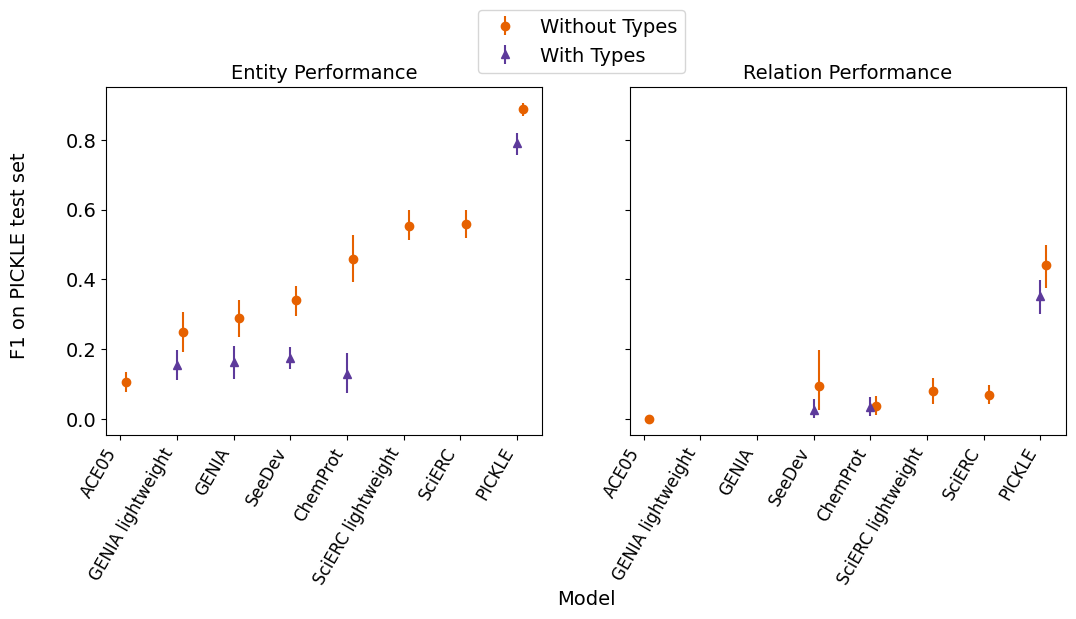

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(12,6), sharex=True, sharey=True)

name_x = [label_key[mod] for mod in dygiepp_no_labels_perf["model"]]

axs[0].errorbar(x=dygiepp_no_labels_perf["x"] + 0.1, y=dygiepp_no_labels_perf["ent_F1"], yerr=no_lab_pick_ent_CIs, fmt="o", color='#E66100')
axs[0].errorbar(x=typed_eval_dygiepp_all_df["x"], y=typed_eval_dygiepp_all_df["ent_F1"], yerr=lab_pick_ent_CIs, fmt="^", color='#5D3A9B')

axs[1].errorbar(x=dygiepp_no_labels_perf["x"] + 0.1, y=dygiepp_no_labels_perf["rel_F1"], yerr=no_lab_pick_rel_CIs, fmt="o", color='#E66100', label='Without Types')
axs[1].errorbar(x=typed_eval_dygiepp_all_df["x"], y=typed_eval_dygiepp_all_df["rel_F1"], yerr=lab_pick_rel_CIs, fmt="^", color='#5D3A9B', label='With Types')

axs[0].set_xticks(dygiepp_no_labels_perf["x"], name_x, size=12, rotation=60, ha='right')
axs[1].set_xticks(dygiepp_no_labels_perf["x"], name_x, size=12, rotation=60, ha='right')

axs[0].set_title('Entity Performance', size=14)
axs[1].set_title('Relation Performance', size=14)
axs[1].legend(bbox_to_anchor=(0.15,1.25))
fig.supxlabel('Model', size=14)
fig.supylabel('F1 on PICKLE test set', y=0.6,  size=14)
fig.subplots_adjust(bottom=0.3, left=0.1)

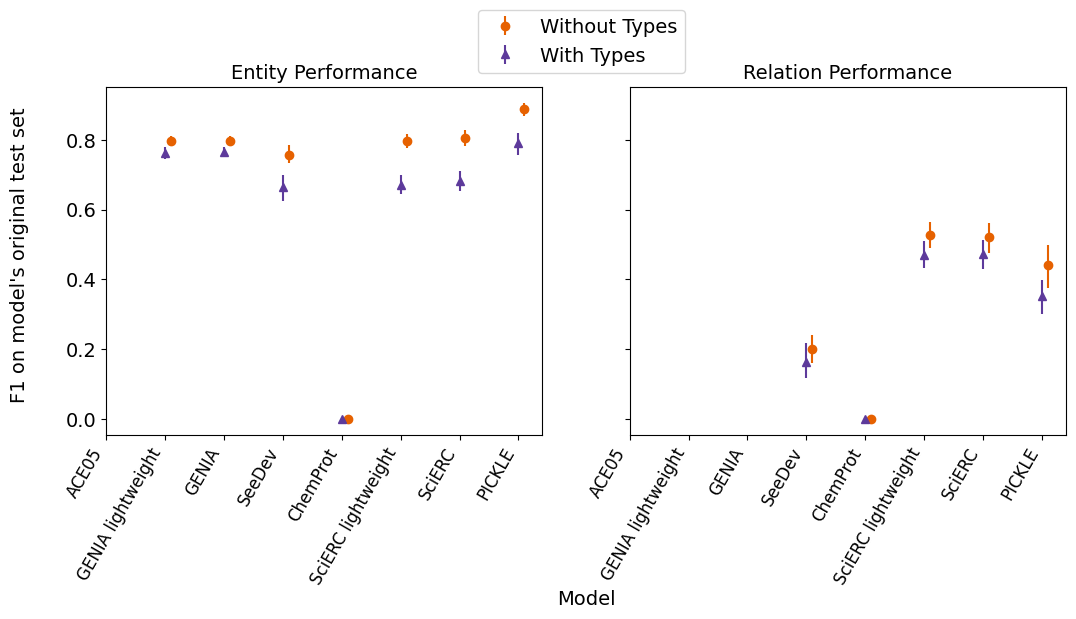

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(12,6), sharex=True, sharey=True)

name_x = [label_key[mod] for mod in dygiepp_no_labels_perf["model"]]

axs[0].errorbar(x=original_dom_no_label_eval_dygiepp_all_df["x"] +0.1, y=original_dom_no_label_eval_dygiepp_all_df["ent_F1"], yerr=no_lab_orig_ent_CIs, fmt="o", color='#E66100', label='Without Types')
axs[0].errorbar(x=original_dom_typed_eval_dygiepp_all_df["x"], y=original_dom_typed_eval_dygiepp_all_df["ent_F1"], yerr=lab_orig_ent_CIs, fmt="^", color='#5D3A9B', label='With Types')

axs[1].errorbar(x=original_dom_no_label_eval_dygiepp_all_df["x"] +0.1, y=original_dom_no_label_eval_dygiepp_all_df["rel_F1"], yerr=no_lab_orig_rel_CIs, fmt="o", color='#E66100', label='Without Types')
axs[1].errorbar(x=original_dom_typed_eval_dygiepp_all_df["x"], y=original_dom_typed_eval_dygiepp_all_df["rel_F1"], yerr=lab_orig_rel_CIs, fmt="^", color='#5D3A9B', label='With Types')

axs[0].set_xticks(dygiepp_no_labels_perf["x"], name_x, size=12, rotation=60, ha='right')
axs[1].set_xticks(dygiepp_no_labels_perf["x"], name_x, size=12, rotation=60, ha='right')

axs[0].set_title('Entity Performance', size=14)
axs[1].set_title('Relation Performance', size=14)
axs[1].legend(bbox_to_anchor=(0.15,1.25))
fig.supxlabel('Model', size=14)
fig.supylabel('F1 on model\'s original test set', y=0.6, size=14, va='center')
fig.subplots_adjust(bottom=0.3, left=0.1)

#### Precision

In [18]:
no_lab_pick_ent_prec_CIs, no_lab_pick_rel_prec_CIs = process_CIs(dygiepp_no_labels_perf, kind='precision')
lab_pick_ent_prec_CIs, lab_pick_rel_prec_CIs = process_CIs(typed_eval_dygiepp_all_df, kind='precision')
no_lab_orig_ent_prec_CIs, no_lab_orig_rel_prec_CIs = process_CIs(original_dom_no_label_eval_dygiepp_all_df, kind='precision')
lab_orig_ent_prec_CIs, lab_orig_rel_prec_CIs = process_CIs(original_dom_typed_eval_dygiepp_all_df, kind='precision')

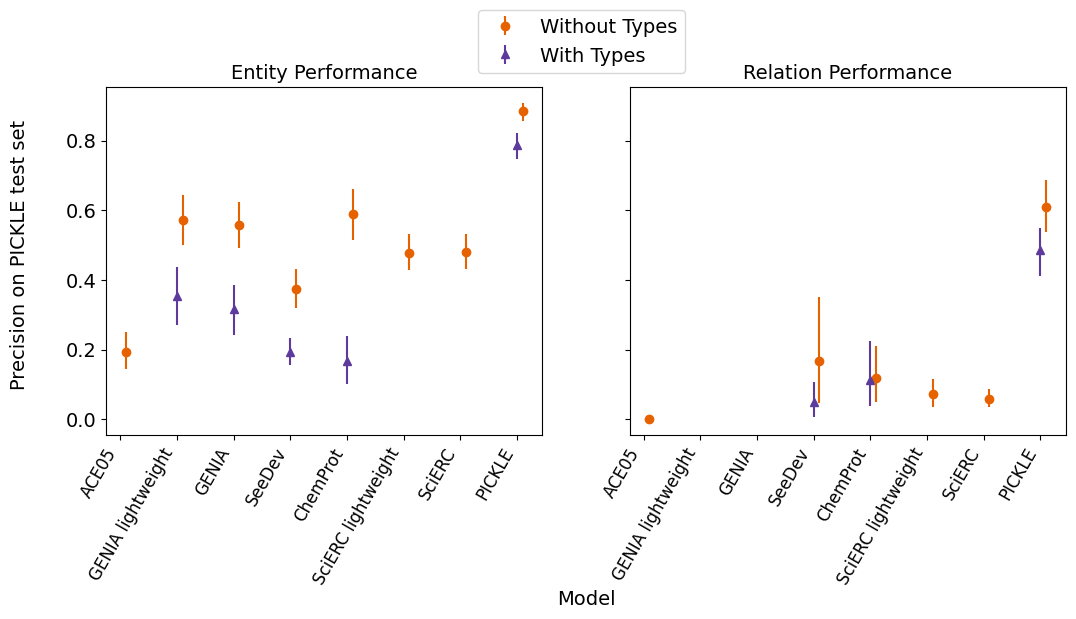

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(12,6), sharex=True, sharey=True)

name_x = [label_key[mod] for mod in dygiepp_no_labels_perf["model"]]

axs[0].errorbar(x=dygiepp_no_labels_perf["x"] + 0.1, y=dygiepp_no_labels_perf["ent_precision"], yerr=no_lab_pick_ent_prec_CIs, fmt="o", color='#E66100')
axs[0].errorbar(x=typed_eval_dygiepp_all_df["x"], y=typed_eval_dygiepp_all_df["ent_precision"], yerr=lab_pick_ent_prec_CIs, fmt="^", color='#5D3A9B')

axs[1].errorbar(x=dygiepp_no_labels_perf["x"] + 0.1, y=dygiepp_no_labels_perf["rel_precision"], yerr=no_lab_pick_rel_prec_CIs, fmt="o", color='#E66100', label='Without Types')
axs[1].errorbar(x=typed_eval_dygiepp_all_df["x"], y=typed_eval_dygiepp_all_df["rel_precision"], yerr=lab_pick_rel_prec_CIs, fmt="^", color='#5D3A9B', label='With Types')

axs[0].set_xticks(dygiepp_no_labels_perf["x"], name_x, size=12, rotation=60, ha='right')
axs[1].set_xticks(dygiepp_no_labels_perf["x"], name_x, size=12, rotation=60, ha='right')

axs[0].set_title('Entity Performance', size=14)
axs[1].set_title('Relation Performance', size=14)
axs[1].legend(bbox_to_anchor=(0.15,1.25))
fig.supxlabel('Model', size=14)
fig.supylabel('Precision on PICKLE test set', y=0.6,  size=14)
fig.subplots_adjust(bottom=0.3, left=0.1)

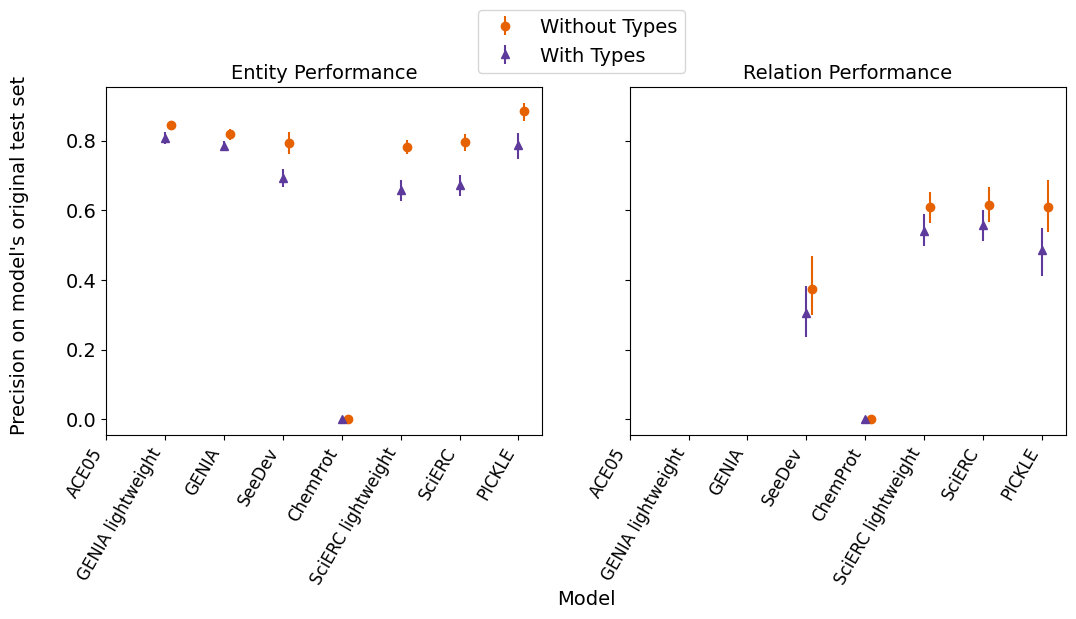

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(12,6), sharex=True, sharey=True)

name_x = [label_key[mod] for mod in dygiepp_no_labels_perf["model"]]

axs[0].errorbar(x=original_dom_no_label_eval_dygiepp_all_df["x"] +0.1, y=original_dom_no_label_eval_dygiepp_all_df["ent_precision"], yerr=no_lab_orig_ent_prec_CIs, fmt="o", color='#E66100', label='Without Types')
axs[0].errorbar(x=original_dom_typed_eval_dygiepp_all_df["x"], y=original_dom_typed_eval_dygiepp_all_df["ent_precision"], yerr=lab_orig_ent_prec_CIs, fmt="^", color='#5D3A9B', label='With Types')

axs[1].errorbar(x=original_dom_no_label_eval_dygiepp_all_df["x"] +0.1, y=original_dom_no_label_eval_dygiepp_all_df["rel_precision"], yerr=no_lab_orig_rel_prec_CIs, fmt="o", color='#E66100', label='Without Types')
axs[1].errorbar(x=original_dom_typed_eval_dygiepp_all_df["x"], y=original_dom_typed_eval_dygiepp_all_df["rel_precision"], yerr=lab_orig_rel_prec_CIs, fmt="^", color='#5D3A9B', label='With Types')

axs[0].set_xticks(dygiepp_no_labels_perf["x"], name_x, size=12, rotation=60, ha='right')
axs[1].set_xticks(dygiepp_no_labels_perf["x"], name_x, size=12, rotation=60, ha='right')

axs[0].set_title('Entity Performance', size=14)
axs[1].set_title('Relation Performance', size=14)
axs[1].legend(bbox_to_anchor=(0.15,1.25))
fig.supxlabel('Model', size=14)
fig.supylabel('Precision on model\'s original test set', y=0.6, size=14, va='center')
fig.subplots_adjust(bottom=0.3, left=0.1)

#### Recall

In [21]:
no_lab_pick_ent_rec_CIs, no_lab_pick_rel_rec_CIs = process_CIs(dygiepp_no_labels_perf, kind='recall')
lab_pick_ent_rec_CIs, lab_pick_rel_rec_CIs = process_CIs(typed_eval_dygiepp_all_df, kind='recall')
no_lab_orig_ent_rec_CIs, no_lab_orig_rel_rec_CIs = process_CIs(original_dom_no_label_eval_dygiepp_all_df, kind='recall')
lab_orig_ent_rec_CIs, lab_orig_rel_rec_CIs = process_CIs(original_dom_typed_eval_dygiepp_all_df, kind='recall')

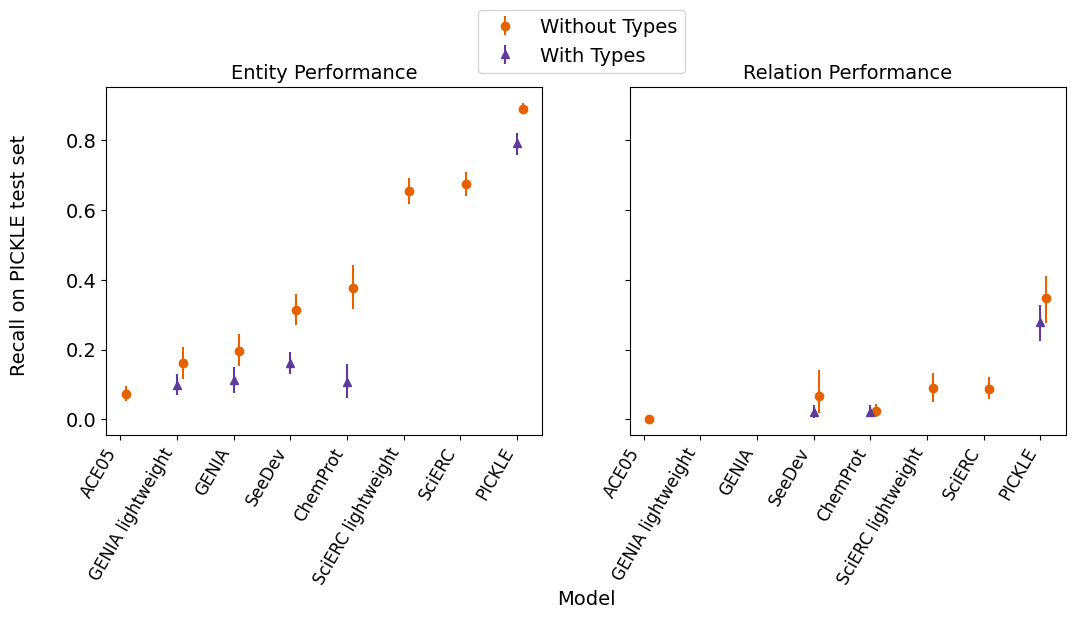

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(12,6), sharex=True, sharey=True)

name_x = [label_key[mod] for mod in dygiepp_no_labels_perf["model"]]

axs[0].errorbar(x=dygiepp_no_labels_perf["x"] + 0.1, y=dygiepp_no_labels_perf["ent_recall"], yerr=no_lab_pick_ent_rec_CIs, fmt="o", color='#E66100')
axs[0].errorbar(x=typed_eval_dygiepp_all_df["x"], y=typed_eval_dygiepp_all_df["ent_recall"], yerr=lab_pick_ent_rec_CIs, fmt="^", color='#5D3A9B')

axs[1].errorbar(x=dygiepp_no_labels_perf["x"] + 0.1, y=dygiepp_no_labels_perf["rel_recall"], yerr=no_lab_pick_rel_rec_CIs, fmt="o", color='#E66100', label='Without Types')
axs[1].errorbar(x=typed_eval_dygiepp_all_df["x"], y=typed_eval_dygiepp_all_df["rel_recall"], yerr=lab_pick_rel_rec_CIs, fmt="^", color='#5D3A9B', label='With Types')

axs[0].set_xticks(dygiepp_no_labels_perf["x"], name_x, size=12, rotation=60, ha='right')
axs[1].set_xticks(dygiepp_no_labels_perf["x"], name_x, size=12, rotation=60, ha='right')

axs[0].set_title('Entity Performance', size=14)
axs[1].set_title('Relation Performance', size=14)
axs[1].legend(bbox_to_anchor=(0.15,1.25))
fig.supxlabel('Model', size=14)
fig.supylabel('Recall on PICKLE test set', y=0.6,  size=14)
fig.subplots_adjust(bottom=0.3, left=0.1)

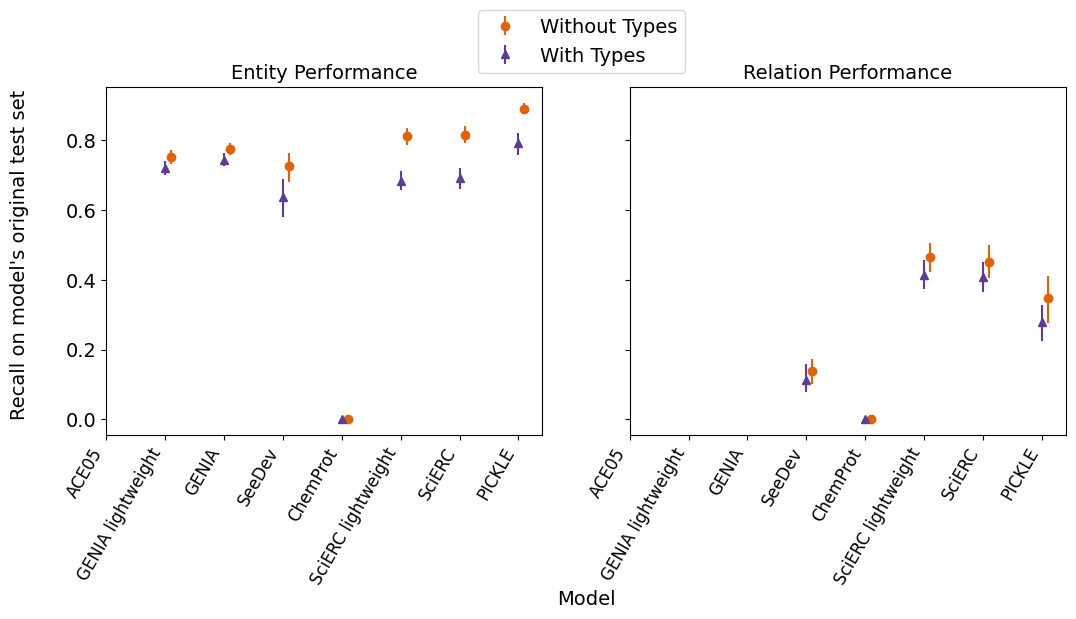

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(12,6), sharex=True, sharey=True)

name_x = [label_key[mod] for mod in dygiepp_no_labels_perf["model"]]

axs[0].errorbar(x=original_dom_no_label_eval_dygiepp_all_df["x"] +0.1, y=original_dom_no_label_eval_dygiepp_all_df["ent_recall"], yerr=no_lab_orig_ent_rec_CIs, fmt="o", color='#E66100', label='Without Types')
axs[0].errorbar(x=original_dom_typed_eval_dygiepp_all_df["x"], y=original_dom_typed_eval_dygiepp_all_df["ent_recall"], yerr=lab_orig_ent_rec_CIs, fmt="^", color='#5D3A9B', label='With Types')

axs[1].errorbar(x=original_dom_no_label_eval_dygiepp_all_df["x"] +0.1, y=original_dom_no_label_eval_dygiepp_all_df["rel_recall"], yerr=no_lab_orig_rel_rec_CIs, fmt="o", color='#E66100', label='Without Types')
axs[1].errorbar(x=original_dom_typed_eval_dygiepp_all_df["x"], y=original_dom_typed_eval_dygiepp_all_df["rel_recall"], yerr=lab_orig_rel_rec_CIs, fmt="^", color='#5D3A9B', label='With Types')

axs[0].set_xticks(dygiepp_no_labels_perf["x"], name_x, size=12, rotation=60, ha='right')
axs[1].set_xticks(dygiepp_no_labels_perf["x"], name_x, size=12, rotation=60, ha='right')

axs[0].set_title('Entity Performance', size=14)
axs[1].set_title('Relation Performance', size=14)
axs[1].legend(bbox_to_anchor=(0.15,1.25))
fig.supxlabel('Model', size=14)
fig.supylabel('Recall on model\'s original test set', y=0.6, size=14, va='center')
fig.subplots_adjust(bottom=0.3, left=0.1)

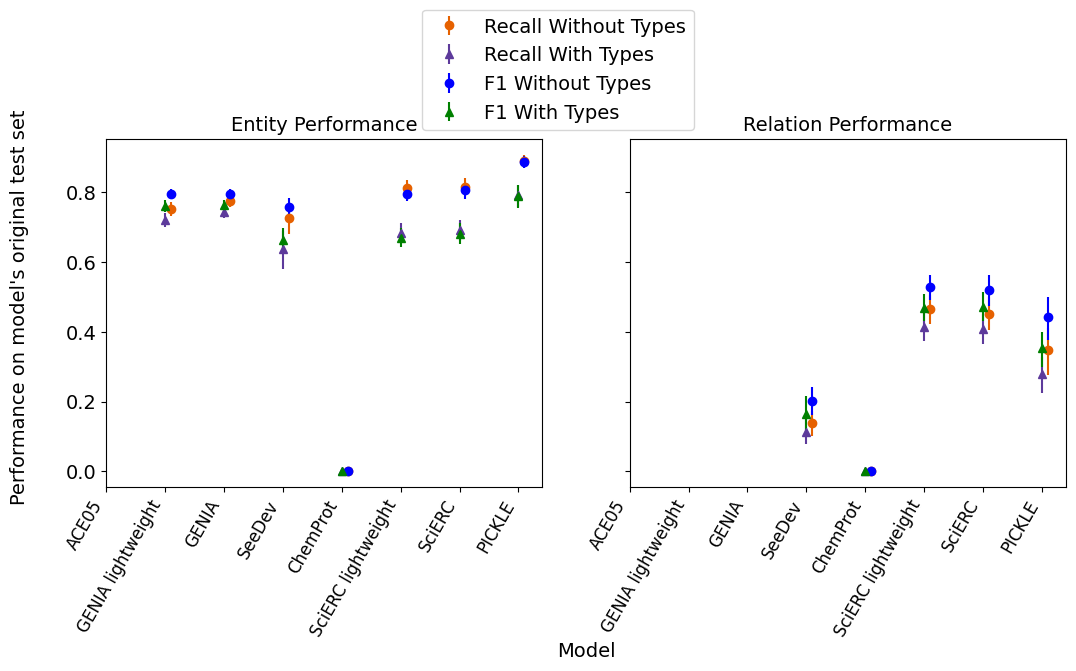

In [24]:
# Santiy check to make sure there is actually a difference between recall and F1 and I didn't jsut make a typo
fig, axs = plt.subplots(1, 2, figsize=(12,6), sharex=True, sharey=True)

name_x = [label_key[mod] for mod in dygiepp_no_labels_perf["model"]]

axs[0].errorbar(x=original_dom_no_label_eval_dygiepp_all_df["x"] +0.1, y=original_dom_no_label_eval_dygiepp_all_df["ent_recall"], yerr=no_lab_orig_ent_rec_CIs, fmt="o", color='#E66100', label='Recall Without Types')
axs[0].errorbar(x=original_dom_typed_eval_dygiepp_all_df["x"], y=original_dom_typed_eval_dygiepp_all_df["ent_recall"], yerr=lab_orig_ent_rec_CIs, fmt="^", color='#5D3A9B', label='Recall With Types')

axs[1].errorbar(x=original_dom_no_label_eval_dygiepp_all_df["x"] +0.1, y=original_dom_no_label_eval_dygiepp_all_df["rel_recall"], yerr=no_lab_orig_rel_rec_CIs, fmt="o", color='#E66100', label='Recall Without Types')
axs[1].errorbar(x=original_dom_typed_eval_dygiepp_all_df["x"], y=original_dom_typed_eval_dygiepp_all_df["rel_recall"], yerr=lab_orig_rel_rec_CIs, fmt="^", color='#5D3A9B', label='Recall With Types')

axs[0].set_xticks(dygiepp_no_labels_perf["x"], name_x, size=12, rotation=60, ha='right')
axs[1].set_xticks(dygiepp_no_labels_perf["x"], name_x, size=12, rotation=60, ha='right')


axs[0].errorbar(x=original_dom_no_label_eval_dygiepp_all_df["x"] +0.1, y=original_dom_no_label_eval_dygiepp_all_df["ent_F1"], yerr=no_lab_orig_ent_CIs, fmt="o", color='blue', label='F1 Without Types')
axs[0].errorbar(x=original_dom_typed_eval_dygiepp_all_df["x"], y=original_dom_typed_eval_dygiepp_all_df["ent_F1"], yerr=lab_orig_ent_CIs, fmt="^", color='green', label='F1 With Types')

axs[1].errorbar(x=original_dom_no_label_eval_dygiepp_all_df["x"] +0.1, y=original_dom_no_label_eval_dygiepp_all_df["rel_F1"], yerr=no_lab_orig_rel_CIs, fmt="o", color='blue', label='F1 Without Types')
axs[1].errorbar(x=original_dom_typed_eval_dygiepp_all_df["x"], y=original_dom_typed_eval_dygiepp_all_df["rel_F1"], yerr=lab_orig_rel_CIs, fmt="^", color='green', label='F1 With Types')

axs[0].set_xticks(dygiepp_no_labels_perf["x"], name_x, size=12, rotation=60, ha='right')
axs[1].set_xticks(dygiepp_no_labels_perf["x"], name_x, size=12, rotation=60, ha='right')

axs[0].set_title('Entity Performance', size=14)
axs[1].set_title('Relation Performance', size=14)
axs[1].legend(bbox_to_anchor=(0.17,1.4))
fig.supxlabel('Model', size=14)
fig.supylabel('Performance on model\'s original test set', y=0.6, size=14, va='center')
fig.subplots_adjust(bottom=0.3, left=0.1)

### Bubble plots for main figure
We want to make bubble plots where the x-axis is entity performance, the y-axis is relation performance, and the size of the bubble is the standard deviation in each direction. 
<br><br>
Since we have different standard deviations on each axis (one for entity performance and one for relation performance), we want to use an ellipse instead of a circle as the shape for each point. This means that we can't use the standard matplotlib way of building these plots, which just uses the `s` keyword to change the size of the bubble. We'll instead have to plot an ellipse for each point. The horizontal axis of the ellipse will be bounded by the confidence interval endpoints for entity performance, and the vertical axis will be the confidence interval endpoints for relation performance.

### F1

To set up the data for this plot, we need to get the 4 values required to plot an ellipse (cetner's x and y values, width and height), as well as the label for the point for each point, and its group (original or pickle).

In [25]:
def get_interval_distance(i):
    """
    Get the width or height from a CI.
    
    parameters:
        i: CI value from df
        
    returns:
        dist, float: a number if the interval exists, np.nan otherwise
    """
    try:
        len(i) == 2
        dist = literal_eval(i)[1] - literal_eval(i)[0]
    except TypeError:
        dist = np.nan
        
    return dist

In [26]:
def get_ellipse_values(perf_df, model_idx, metric):
    """
    Get the x, y, width and height for an ellipse.
    
    parameters:
        perf_df, df: dataframe containing performance values
        model_idx, str: name of the row to be used
        metric, str: "F1", "precision", or "recall", determines which metric for which
            to obtain an ellipse
    
    returns:
        ellipse_tup, tuple of floats: (x, y, width, height) if there is performance for 
            both entities and relations, (x, NaN, width, NaN) if there is no relation performance,
            "EXCLUDE" if there is no performance for either.
    """
    # Get the names of the columns we care about
    x_col_name = f'ent_{metric}'
    y_col_name = f'rel_{metric}'
    x_CI_col_name = f'ent_{metric}_CI'
    y_CI_col_name = f'rel_{metric}_CI'
    
    # Get the x and y values for the center of the ellipse
    x = perf_df.loc[model_idx, x_col_name]
    y = perf_df.loc[model_idx, y_col_name]
    
    # Get the width and height
    width = get_interval_distance(perf_df.loc[model_idx, x_CI_col_name])
    height = get_interval_distance(perf_df.loc[model_idx, y_CI_col_name])
    
    ellipse_tup = (x, y, width, height)
        
    return ellipse_tup
    

In [27]:
# Get the ellipse values for all models
graph_part = {}
for name, df in all_perfs.items():
    this_df_ells = {}
    for i in df.index:
        ell = get_ellipse_values(df, i, 'F1')
        model = df.loc[i, "model"]
        this_df_ells[model] = ell
    graph_part[name] = this_df_ells

In [49]:
full_entry_colors = {'scierc': 'royalblue',
                     'scierc-lightweight': 'mediumblue',
                     'ace05-relation': 'gold',
                     'genia': 'coral',
                     'genia-lightweight': 'orangered',
                    'chemprot': 'fuchsia',
                    'seedev': 'forestgreen',
                    'pickle': 'lightgreen'}

In [50]:
graph_part.keys()

dict_keys(['on_pickle_withOUT_types', 'on_pickle_with_types', 'on_original_withOUT_types', 'on_original_with_types'])

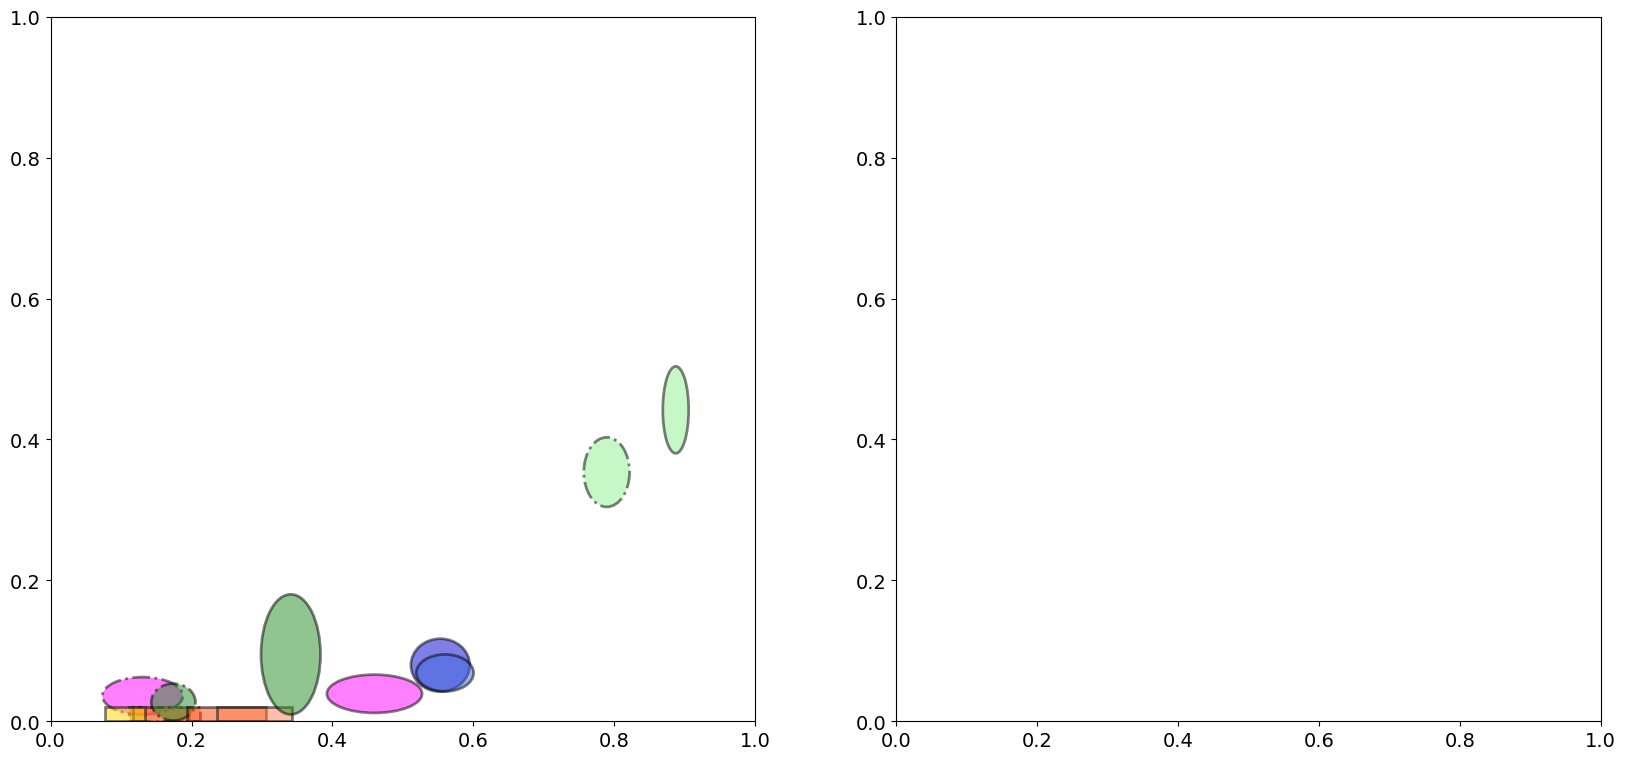

In [51]:
fig, axs = plt.subplots(1, 2, subplot_kw={'aspect': 'equal'}, figsize=(20, 20), sharex=True)
fig.subplots_adjust(hspace=0.05)

for model, ell_tup in graph_part['on_pickle_with_types'].items():

    if 0 in ell_tup:
        rect_x = ell_tup[0] - 0.5*ell_tup[2]
        shape = Rectangle((rect_x, 0), ell_tup[2], 0.02, edgecolor='black', linewidth=2,
                          linestyle='dashdot', facecolor=full_entry_colors[model], label=label_key[model], alpha=0.5)
    else:
        shape = Ellipse((ell_tup[0], ell_tup[1]), ell_tup[2], ell_tup[3], edgecolor='black', linewidth=2,
                        linestyle='dashdot', facecolor=full_entry_colors[model], label=label_key[model], alpha=0.5)
    
    # Add shape to axis
    axs[0].add_artist(shape)

for model, ell_tup in graph_part['on_pickle_withOUT_types'].items():

    if 0 in ell_tup:
        rect_x = ell_tup[0] - 0.5*ell_tup[2]
        shape = Rectangle((rect_x, 0), ell_tup[2], 0.02, edgecolor='black', linewidth=2,
                          linestyle='solid', facecolor=full_entry_colors[model], label=label_key[model], alpha=0.5)
    else:
        shape = Ellipse((ell_tup[0], ell_tup[1]), ell_tup[2], ell_tup[3], edgecolor='black', linewidth=2,
                        linestyle='solid', facecolor=full_entry_colors[model], label=label_key[model], alpha=0.5)
    
    # Add shape to axis
    axs[0].add_artist(shape)

In [ ]:
fig, axs = plt.subplots(2, subplot_kw={'aspect': 'equal'}, figsize=(20, 20), sharex=True)
fig.subplots_adjust(hspace=0.05)

######################### Make 2D plot for models with both values ##############################
for label in full_laydown_order:
    
    # Get ellipse
    ell_tup = f1_full_entries[label]
    # Get color & linestyle
    color_label = ' | '.join(label.split(' | ')[:-1])
    color = full_entry_colors[color_label]
    if label.split(' | ')[-1] == 'Original':
        linestyle = ':'
    else:
        linestyle = '-'
        
    # If the relation performance and CI are zero, need to make a thin rectangle instead of an ellipse
    if 0 in ell_tup:
        rect_x = ell_tup[0] - 0.5*ell_tup[2]
        shape = Rectangle((rect_x, 0), ell_tup[2], 0.02, edgecolor='black', linewidth=2,
                          linestyle=linestyle, facecolor=color, label=color_label, alpha=0.5)
    else:
        shape = Ellipse((ell_tup[0], ell_tup[1]), ell_tup[2], ell_tup[3], edgecolor='black', linewidth=2,
                        linestyle=linestyle, facecolor=color, label=color_label, alpha=0.5)
    
    # Add shape to axis
    axs[0].add_artist(shape)

axs[0].set_ylabel('Relation Performance')

# Keep only the solid line version of each model/training set combination
ellipses, labels = axs[0].get_legend_handles_labels()
keep_labs, keep_ells = [], []
for lab, ell in zip(full_laydown_order, ellipses):
    if lab not in keep_labs and 'PICKLE' in lab:
        keep_labs.append(lab)
        keep_ells.append(ell)
legend1 = axs[0].legend(handles=keep_ells, loc='upper left')
# Dummy lines with NO entries, just to create the black style legend
dummy_lines = []
for linestyle, label in zip([':', '-'], ['Original', 'PICKLE']):
    dummy_lines.append(Ellipse((0, 0), 0, 0, edgecolor="black", linewidth=2, linestyle=linestyle, label=label,
                              facecolor='white'))
legend2 = axs[0].legend(dummy_lines, ['Original', 'PICKLE'])
for legobj in legend2.legendHandles:
    if legobj._label == 'PICKLE':
        legobj.set_linewidth(1)
axs[0].add_artist(legend1)
axs[0].add_artist(legend2)

####################################### Make 1D plot for GENIA models ##################################
# axs[1].axhline(0.75, 0, 1, color='black')
axs[1].spines['bottom'].set_position(('axes', 0.98))
axs[1].spines['right'].set_color('none')
axs[1].spines['top'].set_color('none')
axs[1].spines['left'].set_color('none')
axs[1].set_yticks([])
axs[1].set_xlabel('Entity Performance')

for label, ell_tup in f1_partial_entries.items():
    
    # Get color & linestyle
    color_label = ' | '.join(label.split(' | ')[:-1])
    color = full_entry_colors[color_label]
    if label.split(' | ')[-1] == 'Original':
        linestyle = ':'
    else:
        linestyle = '-'
    
    # Make rectangle
    rect_x = ell_tup[0] - 0.5*ell_tup[2]
    shape = Rectangle((rect_x, 0.98), ell_tup[2], 0.02, edgecolor='black', linewidth=2,
                      linestyle=linestyle, facecolor=color, label=color_label, alpha=0.5)

    # Add shape to axis
    axs[1].add_artist(shape)

# Keep only the solid line version of each model/training set combination
rects, labels = axs[1].get_legend_handles_labels()
keep_labs, keep_rects = [], []
for lab, rec in zip(labels, rects):
    if lab not in keep_labs:
        keep_labs.append(lab)
        keep_rects.append(rec)
legend1 = axs[1].legend(handles=keep_rects, loc=(0.01,0.8))
# Dummy lines with NO entries, just to create the black style legend
dummy_lines = []
for linestyle, label in zip([':', '-'], ['Original', 'PICKLE']):
    dummy_lines.append(Ellipse((0, 0), 0, 0, edgecolor="black", linewidth=2, linestyle=linestyle, label=label,
                              facecolor='white'))
legend2 = axs[1].legend(dummy_lines, ['Original', 'PICKLE'], loc=(0.8,0.8))
for legobj in legend2.legendHandles:
    if legobj._label == 'PICKLE':
        legobj.set_linewidth(1)
axs[1].add_artist(legend1)
axs[1].add_artist(legend2)

############################################### Annotate plot #######################################
orig_text = 'Performance on original\ndomain for all models\nis nearly identical'
pick_text = 'On PICKLE, SciERC models\noutperform GENIA models\nfor entity extraction'
ace_text = 'ACE05 models extract 0\nrelations, and also have\npoor entity extraction'

axs[0].annotate('', xy=(0.8, 0), xytext=(0.8,0.45), arrowprops=dict(arrowstyle='<->', lw=2))
axs[0].text(
    0.64, 0.4, orig_text, ha="center", va="center", size=12,
    bbox=dict(boxstyle='round', fc="white", ec="black", lw=2))

axs[0].annotate('', xy=(0.3, 0), xycoords='data',
            xytext=(0.55, 0.1), textcoords='data',
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="bar,angle=360,fraction=-0.2", lw=2))
axs[0].text(
    0.43, 0.22, pick_text, ha="center", va="center", size=12,
    bbox=dict(boxstyle='round', fc="white", ec="black", lw=2))

axs[0].annotate('', xy=(0.1, 0.03), xytext=(0.1,0.45), arrowprops=dict(arrowstyle='->', lw=2))
axs[0].text(
    0.175, 0.5, ace_text, ha="center", va="center", size=12,
    bbox=dict(boxstyle='round', fc="white", ec="black", lw=2))

plt.savefig('../data/straying_off_topic_data/model_performance/bubbleplot_F1.png', bbox_inches='tight', dpi=600)

#### Traditional bar plot representation

In [ ]:
def get_intervals_w_nan(CIs):
    """
    Gets list of intervals for lists that have NaN values.
    
    parameters:
        CIs, list of tuple & nan: confidence intervals
    
    returns:
        intervals, list of float: interval distances
    """
    intervals = []
    for i in CIs:
        try:
            len(i) == 2
            interv = literal_eval(i)[1] - literal_eval(i)[0]
        except TypeError:
            interv = 0

        intervals.append(interv)
    return intervals

In [ ]:
pickle_ent_intervals = [literal_eval(i)[1] - literal_eval(i)[0] for i in all_perf.ent_F1_CI_pickle]
orig_ent_intervals = get_intervals_w_nan(all_perf.ent_F1_CI_original)
pickle_rel_intervals = get_intervals_w_nan(all_perf.rel_F1_CI_pickle)
orig_rel_intervals = get_intervals_w_nan(all_perf.rel_F1_CI_original)

In [ ]:
# Format labels
labels = []
for i, l in enumerate(all_perf.index.values):

    arc = l.split()[0]
    # Get model architecture shorthand
    if arc == 'DyGIE++':
        arc = 'D'
    elif arc == 'PURE':
        arc = 'P'
    mod = l.split()[1]
    
    try:
        # Get the model's dataset name
        mod_n = mod.split('-')[0]
        if mod_n == 'scierc':
            mod_n = 'S'
        elif mod_n == 'genia':
            mod_n = 'G'
        elif mod_n == 'ace05':
            mod_n = 'A'
            
        # Add asterisk for lightweight model
        mod_t = mod.split('-')[1]
        if mod_t == 'lightweight':
            mod_t = '*'
        else: mod_t = ''
    
        # Make label
        l = f'{arc}\n{mod_n}{mod_t}'
        
    except IndexError:
        
        # Get the correct name
        if mod == 'scierc':
            mod = 'S'
        elif mod == 'genia':
            mod = 'G'
        elif mod == 'ace05':
            mod = 'A'

        l = f'{arc}\n{mod}'
     
    labels.append(l)

In [ ]:
X_axis = np.arange(len(all_perf.index))

fig, axs = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(14,8))

axs[0].bar(X_axis - 0.2, all_perf.ent_F1_original, 0.4, yerr=orig_ent_intervals, label = 'In-domain performance')
axs[0].bar(X_axis + 0.2, all_perf.ent_F1_pickle, 0.4, yerr=pickle_ent_intervals, label = 'Performance on PICKLE')
axs[0].set_title('Entities')

# Add NA over bars where original domain performance couldn't be evaluated
nan_text = 'NA'
for i, val in enumerate(all_perf.ent_F1_original):
    if np.isnan(val):
        xloc = X_axis[i] - 0.4
        axs[0].annotate(nan_text, (xloc, 0))
        
axs[1].bar(X_axis - 0.2, all_perf.rel_F1_original, 0.4, yerr=orig_rel_intervals, label = 'In-domain performance')
axs[1].bar(X_axis + 0.2, all_perf.rel_F1_pickle, 0.4, yerr=pickle_rel_intervals, label = 'Performance on PICKLE')
axs[1].set_title('Relations')

# Add NA over bars where the model didn't have relation capabilities or original domain performance
# couldn't be evaluated
nan_text = 'NA'
for i, val in enumerate(all_perf.rel_F1_original):
    if np.isnan(val):
        xloc = X_axis[i] - 0.4
        axs[1].annotate(nan_text, (xloc, 0))
for i, val in enumerate(all_perf.rel_F1_pickle):
    if np.isnan(val):
        xloc = X_axis[i] + 0.1
        axs[1].annotate(nan_text, (xloc, 0))
    
plt.xticks(ticks=X_axis, labels=labels)
box_text = 'Architecture\nModel'
axs[0].text(-1.5, -0.065, box_text, ha='right', va='center',
                 size=16)
fig.supylabel("F1 Score", fontsize=16)
fig.subplots_adjust(bottom=0.3, left=0.075)
plt.ylim(0,1)
plt.legend(loc=(0.43,1.2))
plt.savefig('../data/straying_off_topic_data/model_performance/paper_F1_w_errorbars.png', bbox_inches='tight', dpi=600)

### Precision & recall combined plot
In the spirit of the bubbleplot F1 figure, here we'll make a similar figure, excpept where the x and y axes are precision and recall, respectively. Here, I'll only include the model performance on the PICKLE dataset (leaving out the performance on the original dataset), as well as only making this plot for entities for GENIA and SciERC (since we're using it to compare SciERC and GENIA, and GENIA doesn't have relation performance). I'll use color to indicate the dataset the model was trained on, and the linestyle to indicate the model architecture.

In [ ]:
all_perf.index.values

In [ ]:
def get_ellipse_values_precrec(perf_df, model_idx, mode):
    """
    Get the x, y, width and height for an ellipse where the x axis is precision, and
    the y axis is recall.
    
    parameters:
        perf_df, df: dataframe containing performance values
        model_idx, str: name of the row to be used
        mode, str: "original" or "pickle", determines which of the performances
            for the given metric should be used
    
    returns:
        ellipse_tup, tuple of floats: (x, y, width, height) if there is performance for 
            both entities and relations, (x, NaN, width, NaN) if there is no relation performance,
            "EXCLUDE" if there is no performance for either.
    """
    # Get the names of the columns we care about
    x_col_name = f'ent_precision_{mode}'
    y_col_name = f'ent_recall_{mode}'
    x_CI_col_name = f'ent_precision_CI_{mode}'
    y_CI_col_name = f'ent_recall_CI_{mode}'
    
    # Get the x and y values for the center of the ellipse
    x = perf_df.loc[model_idx, x_col_name]
    y = perf_df.loc[model_idx, y_col_name]
    
    # Get the width and height
    width = get_interval_distance(perf_df.loc[model_idx, x_CI_col_name])
    height = get_interval_distance(perf_df.loc[model_idx, y_CI_col_name])
    
    ellipse_tup = (x, y, width, height)
        
    return ellipse_tup
    

In [ ]:
# Generate dictionary entries
precrec_entries = {}
for i, l in enumerate(all_perf.index.values):
    
    # I only want SciERC and GENIA
    if ('scierc' in l) or ('genia' in l):
        # Get the main part of the label
        new_l = get_label(l)

        # Get ellipse values and add color indicator to label
        indicator = 'PICKLE'
        ellipse_tup = get_ellipse_values_precrec(all_perf, l, indicator.lower())
        final_l = new_l + ' | ' + indicator
        precrec_entries[final_l] = ellipse_tup

In [ ]:
precrec_colors = {'SciERC': '#440154FF',
                     'GENIA': '#2A788EFF'}

In [ ]:
fig, ax = plt.subplots(1, subplot_kw={'aspect': 'equal'}, figsize=(10, 10), sharex=True)
fig.subplots_adjust(hspace=0.05)

######################### Make 2D plot for models with both values ##############################
for label in precrec_entries.keys():
    
    # Get ellipse
    ell_tup = precrec_entries[label]
    # Get color & linestyle
    color_label = ' | '.join(label.split(' | ')[:-1])
    if 'S' in color_label:
        color_label = 'SciERC'
    else:
        color_label = 'GENIA'
    color = precrec_colors[color_label]
    if label.split(' | ')[0] == 'P':
        linestyle = '-'
        lw=2
    elif (label.split(' | ')[0] == 'D') and not (label.split(' | ')[1][-1] == '*'):
        linestyle = 'dashed'
        lw=2
    elif (label.split(' | ')[0] == 'D') and (label.split(' | ')[1][-1] == '*'):
        linestyle = 'dotted'
        lw=1
    
        
    # If the relation performance and CI are zero, need to make a thin rectangle instead of an ellipse
    if 0 in ell_tup:
        rect_x = ell_tup[0] - 0.5*ell_tup[2]
        shape = Rectangle((rect_x, 0), ell_tup[2], 0.02, edgecolor='black', linewidth=lw,
                          linestyle=linestyle, facecolor=color, label=color_label, alpha=0.5)
    else:
        shape = Ellipse((ell_tup[0], ell_tup[1]), ell_tup[2], ell_tup[3], edgecolor='black', linewidth=lw,
                        linestyle=linestyle, facecolor=color, label=color_label, alpha=0.5)
    
    # Add shape to axis
    ax.add_artist(shape)

ax.set_xlabel('Precision')
ax.set_ylabel('Recall')

# Keep only the solid line version of each model/training set combination
ellipses, labels = ax.get_legend_handles_labels()
keep_labs, keep_ells = [], []
for lab, ell in zip(labels, ellipses):
    if lab not in keep_labs:
        keep_labs.append(lab)
        keep_ells.append(ell)
legend1 = ax.legend(handles=keep_ells, loc='upper left')

# Dummy lines with NO entries, just to create the black style legend
dummy_lines = []
for linestyle, label in zip(['-', 'dashed', 'dotted'], ['PURE', 'DyGIE++ lightweight', 'DyGIE++']):
    dummy_lines.append(Ellipse((0, 0), 0, 0, edgecolor="black", linewidth=2, linestyle=linestyle, label=label,
                              facecolor='white'))
legend2 = ax.legend(dummy_lines, ['PURE', 'DyGIE++', 'DyGIE++ lightweight'], loc='upper right')
for legobj in legend2.legendHandles:
    if legobj._label == 'PURE':
        legobj.set_linewidth(1)
ax.add_artist(legend1)
ax.add_artist(legend2)

############################################### Annotate plot #######################################
rec_text = 'SciERC models have\nsubstantially better recall\nthan the GENIA models'
prec_text = 'There is no statistically\nsignificant difference\nin precision between\ndatasets'

ax.annotate('', xy=(0.4, 0.2), xytext=(0.4, 0.55), arrowprops=dict(arrowstyle='<->', lw=2))
ax.text(
    0.21, 0.4, rec_text, ha="center", va="center", size=12,
    bbox=dict(boxstyle='round', fc="white", ec="black", lw=2))

ax.annotate('', xy=(0.5, 0.4), xycoords='data',
            xytext=(0.6, 0.4), textcoords='data',
            arrowprops=dict(arrowstyle="<->", lw=2))
ax.text(
    0.75, 0.4, prec_text, ha="center", va="center", size=12,
    bbox=dict(boxstyle='round', fc="white", ec="black", lw=2))


plt.savefig('../data/straying_off_topic_data/model_performance/bubbleplot_precrec.png', bbox_inches='tight', dpi=600)

### Precision and recall separate plots
#### Recall
PURE reports precision and recall values for their pretrained models, but DyGIE++ does not. Adding the recall & precision for PURE here, will put 0 for dygiepp and indicate in the figure legend that 0 means there was no statistic reported.

In [ ]:
# Format labels
labels = []
for i, l in enumerate(all_perf.index.values):

    arc = l.split()[0]
    # Get model architecture shorthand
    if arc == 'DyGIE++':
        arc = 'D'
    elif arc == 'PURE':
        arc = 'P'
    mod = l.split()[1]
    
    try:
        # Get the model's dataset name
        mod_n = mod.split('-')[0]
        if mod_n == 'scierc':
            mod_n = 'S'
        elif mod_n == 'genia':
            mod_n = 'G'
        elif mod_n == 'ace05':
            mod_n = 'A'
            
        # Add asterisk for lightweight model
        mod_t = mod.split('-')[1]
        if mod_t == 'lightweight':
            mod_t = '*'
        else: mod_t = ''
    
        # Make label
        l = f'{arc}\n{mod_n}{mod_t}'
        
    except IndexError:
        
        # Get the correct name
        if mod == 'scierc':
            mod = 'S'
        elif mod == 'genia':
            mod = 'G'
        elif mod == 'ace05':
            mod = 'A'

        l = f'{arc}\n{mod}'
     
    labels.append(l)

In [ ]:
orig_ent_rec_intervals = get_intervals_w_nan(all_perf.ent_recall_CI_original)
orig_rel_rec_intervals = get_intervals_w_nan(all_perf.rel_recall_CI_original)
pickle_ent_rec_intervals = get_intervals_w_nan(all_perf.ent_recall_CI_pickle)
pickle_rel_rec_intervals = get_intervals_w_nan(all_perf.rel_recall_CI_pickle)

In [ ]:
X_axis = np.arange(len(all_perf.index))

fig, axs = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(14,8))

axs[0].bar(X_axis - 0.2, all_perf.ent_recall_original, 0.4, yerr=orig_ent_rec_intervals, label = 'In-domain performance')
axs[0].bar(X_axis + 0.2, all_perf.ent_recall_pickle, 0.4, yerr=pickle_ent_rec_intervals, label = 'Performance on PICKLE')
axs[0].set_title('Entities')

# Add NA over bars where original domain performance couldn't be evaluated
nan_text = 'NA'
for i, val in enumerate(all_perf.ent_F1_original):
    if np.isnan(val):
        xloc = X_axis[i] - 0.4
        axs[0].annotate(nan_text, (xloc, 0))

axs[1].bar(X_axis - 0.2, all_perf.rel_recall_original, 0.4, yerr=orig_rel_rec_intervals, label = 'In-domain performance')
axs[1].bar(X_axis + 0.2, all_perf.rel_recall_pickle, 0.4, yerr=pickle_rel_rec_intervals, label = 'Performance on PICKLE')
axs[1].set_title('Relations')

# Add NA over bars where the model didn't have relation capabilities or original domain performance
# couldn't be evaluated
nan_text = 'NA'
for i, val in enumerate(all_perf.rel_F1_original):
    if np.isnan(val):
        xloc = X_axis[i] - 0.4
        axs[1].annotate(nan_text, (xloc, 0))
for i, val in enumerate(all_perf.rel_F1_pickle):
    if np.isnan(val):
        xloc = X_axis[i] + 0.1
        axs[1].annotate(nan_text, (xloc, 0))
        
plt.xticks(ticks=X_axis, labels=labels)
box_text = 'Architecture\nModel'
axs[0].text(-1.5, -0.065, box_text, ha='right', va='center',
                 size=16)
fig.supylabel("Recall", fontsize=14)
fig.subplots_adjust(bottom=0.3, left=0.075)
plt.ylim(0,1)
plt.legend(loc=(0.43,1.2))
plt.savefig('../data/straying_off_topic_data/model_performance/paper_supp_recall_fig_w_errorbars.png', bbox_inches='tight', dpi=600)

#### Precision

In [ ]:
orig_ent_prec_intervals = get_intervals_w_nan(all_perf.ent_precision_CI_original)
orig_rel_prec_intervals = get_intervals_w_nan(all_perf.rel_precision_CI_original)
pickle_ent_prec_intervals = get_intervals_w_nan(all_perf.ent_precision_CI_pickle)
pickle_rel_prec_intervals = get_intervals_w_nan(all_perf.rel_precision_CI_pickle)

In [ ]:
X_axis = np.arange(len(all_perf.index))

fig, axs = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(14,8))

axs[0].bar(X_axis - 0.2, all_perf.ent_precision_original, 0.4, yerr=orig_ent_prec_intervals, label = 'In-domain performance')
axs[0].bar(X_axis + 0.2, all_perf.ent_precision_pickle, 0.4, yerr=pickle_ent_prec_intervals, label = 'Performance on PICKLE')
axs[0].set_title('Entities')

# Add NA over bars where original domain performance couldn't be evaluated
nan_text = 'NA'
for i, val in enumerate(all_perf.ent_F1_original):
    if np.isnan(val):
        xloc = X_axis[i] - 0.4
        axs[0].annotate(nan_text, (xloc, 0))

axs[1].bar(X_axis - 0.2, all_perf.rel_precision_original, 0.4, yerr=orig_rel_prec_intervals, label = 'In-domain performance')
axs[1].bar(X_axis + 0.2, all_perf.rel_precision_pickle, 0.4, yerr=pickle_rel_prec_intervals, label = 'Performance on PICKLE')
axs[1].set_title('Relations')

# Add NA over bars where the model didn't have relation capabilities or original domain performance
# couldn't be evaluated
nan_text = 'NA'
for i, val in enumerate(all_perf.rel_F1_original):
    if np.isnan(val):
        xloc = X_axis[i] - 0.4
        axs[1].annotate(nan_text, (xloc, 0))
for i, val in enumerate(all_perf.rel_F1_pickle):
    if np.isnan(val):
        xloc = X_axis[i] + 0.1
        axs[1].annotate(nan_text, (xloc, 0))

plt.xticks(ticks=X_axis, labels=labels)
box_text = 'Architecture\nModel'
axs[0].text(-1.5, -0.065, box_text, ha='right', va='center',
                 size=16)
fig.supylabel("Precision", fontsize=14)
fig.subplots_adjust(bottom=0.3, left=0.075)
plt.ylim(0,1)
plt.legend(loc=(0.43,1.2))
plt.savefig('../data/straying_off_topic_data/model_performance/paper_supp_precision_fig_w_errorbars.png', bbox_inches='tight', dpi=600)